In [1]:
import cv2 
import pytesseract
import matplotlib.pyplot as plt

area=  876.0
1.6296296296296295
Texto:  
area=  1318.0
3.0
Texto:  v

area=  2703.0
1.6048387096774193
Texto:  


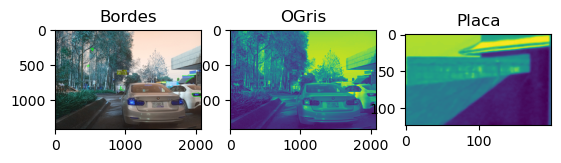

In [46]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
image = cv2.imread('carro21.jpeg')

gris = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gris = cv2.blur(gris,(3,3))
plt.subplot(1, 3, 2)
plt.title("OGris")
plt.imshow(gris)
canny = cv2.Canny(gris,150,200)
canny = cv2.dilate(canny, None, iterations=1)

cnts,_ = cv2.findContours(canny, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    epsilon = 0.09*cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,epsilon,True)
    #cv2.drawContours(image,[c],0,(0,255,0),2)
    if len(approx)==4 and area > 500:
        cv2.drawContours(image,[c],0,(0,255,0),2)
        proporcion =float(w)/h
        if proporcion > 1.6:
            print('area= ', area)
            print(proporcion)
            placa = gris[y:y+h,x:x+w]
            text = pytesseract.image_to_string(placa, config='--psm 11')
            print('Texto: ',text)
           
plt.subplot(1, 3, 1)
plt.title("Bordes")
plt.imshow(image)

plt.subplot(1, 3, 3)
plt.title("Placa")
plt.imshow(placa)

plt.show()